In [1]:
import numpy as np
import numpy.ma as ma
import scipy.stats as stat
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stat

In [7]:
parameters = {}
parameters["channels"] = ["RED"]
parameters["surface functionalities"] = ["PEG"]
parameters["slices"] = ["S1"]
parameters["videos"] = [1]

channels = parameters["channels"]
surface_functionalities = parameters["surface functionalities"]
slices = parameters["slices"]
videos = parameters["videos"]

In [27]:
%matplotlib inline

In [36]:
plt.rcParams['axes.prop_cycle'].by_key()['color']

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [48]:
"yes" + "yes"

'yesyes'

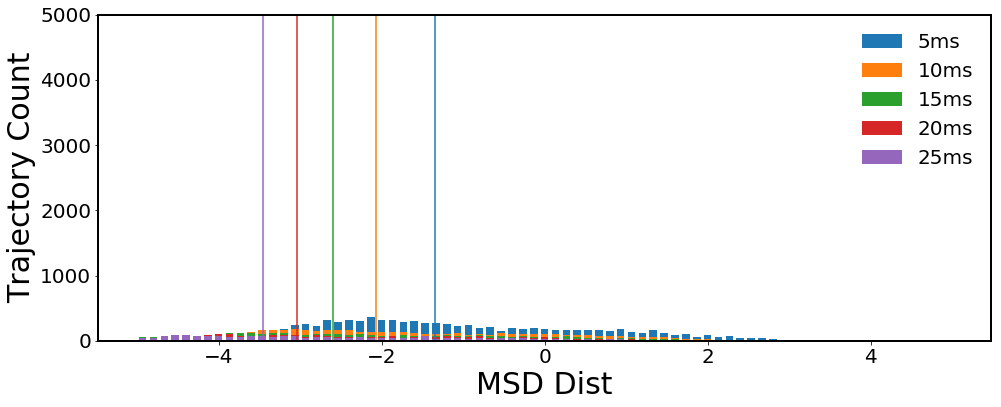

4


In [62]:
fps = 100.02
frames = 651
toi = 0.04 #time of interest

foi = int(np.round(fps*toi)) #frame of interest
xlabel = 'Log Diffusion Coefficient Dist'
ylabel = "Trajectory Count"
analysis = 'log'
theta = "D"
frame_range = range(5, 30, 5)
bar = {}

keys = []
entries = []
for i in range(0, 5):
    keys.append(i)
    entries.append(str(50*(i+1)) + 'ms')

set_x_limit=False
x_range=40

set_y_limit=True
y_range=5000
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for slic in slices:
    for video in videos:

        DIR = 'd:/Chad/11_15_Gel_Exp/11_15_17_Gel_Experiment/5mM/'
        base = 'RED_nPEG_37C_72pH_{}_{}'.format(slic, video)

        filename = base + '_hist'
        SM2xy = np.genfromtxt(DIR + 'SM2xy_' + base + '.csv', delimiter=",")

        fig = plt.figure(figsize=(16, 6))

        counter = 0
        for i in frame_range:
            toi = i/fps;
            if theta == "MSD":
                factor = 1
            else:
                factor = 4*toi

            if analysis == 'log':
                dist = ma.log(SM2xy[i, :]/factor)
                test_bins = np.linspace(-5, 5, 76)    
            else:
                dist = ma.masked_equal(SM2xy[i, :], 0)/factor
                test_bins = np.linspace(0, 20, 76)

            unmask = np.invert(ma.getmask(dist))
            dist = dist[unmask]
            histogram, test_bins = np.histogram(dist, bins=test_bins)

            # Plot_general_histogram_code
            avg = np.mean(dist)
            
            plt.rc('axes', linewidth=2)
            plot = histogram
            bins = test_bins
            width = 0.7 * (bins[1] - bins[0])
            center = (bins[:-1] + bins[1:])/2
            bar[keys[counter]] = plt.bar(center, plot, align='center', width=width, color=colors[counter], label=entries[counter])
            plt.axvline(avg, color=colors[counter])
            plt.xlabel(xlabel, fontsize=30)
            plt.ylabel(ylabel, fontsize=30)
            plt.tick_params(axis='both', which='major', labelsize=20)

            counter = counter + 1
            if set_y_limit:
                plt.gca().set_ylim([0, y_range])

            if set_x_limit:
                plt.gca().set_xlim([0, x_range])
            
            plt.legend(fontsize=20, frameon=False)
        #plt.savefig(DIR + '{}.png'.format(filename), bbox_inches='tight')
        #plt.close('all')
        plt.show()
        print(foi)

In [ ]:
fps = 100.02
frames = 651
toi = 0.04 #time of interest

foi = int(np.round(fps*toi)) #frame of interest
label = 'MSD Dist'
analysis = 'log'
theta = "D"
frame_range = range(5, 30, 5)

set_x_limit=False
x_range=40

set_y_limit=True
y_range=5000


for slic in slices:
    for video in videos:

        DIR = 'd:/Chad/11_15_17_Gel_Experiment/0mM/'
        base = 'RED0_PEG_37C_72pH_{}_{}'.format(slic, video)

        filename = base + '_hist'
        SM2xy = np.genfromtxt(DIR + 'SM2xy_' + base + '.csv', delimiter=",")

        fig = plt.figure(figsize=(16, 6))

        for i in frame_range:
            toi = i/fps;
            if theta == "MSD":
                factor = 1
            else:
                factor = 4*toi

            if analysis == 'log':
                dist = ma.log(SM2xy[i, :]/factor)
                test_bins = np.linspace(-5, 5, 76)    
            else:
                dist = ma.masked_equal(SM2xy[i, :], 0)/factor
                test_bins = np.linspace(0, 20, 76)

            unmask = np.invert(ma.getmask(dist))
            dist = dist[unmask]
            histogram, test_bins = np.histogram(dist, bins=test_bins)


            # Plot_general_histogram_code
            plot = histogram
            bins = test_bins
            width = 0.7 * (bins[1] - bins[0])
            center = (bins[:-1] + bins[1:])/2
            plt.bar(center, plot, align='center', width=width)
            plt.xlabel(label, fontsize=20)

            if set_y_limit:
                plt.gca().set_ylim([0, y_range])

            if set_x_limit:
                plt.gca().set_xlim([0, x_range])

        plt.savefig(DIR + '{}.png'.format(filename), bbox_inches='tight')
        plt.close('all')
        #plt.show()
        print(foi)

In [ ]:
fps = 100.02
frames = 651
toi = 0.04 #time of interest

foi = int(np.round(fps*toi)) #frame of interest
label = 'MSD Dist'
analysis = 'log'
theta = "D"
frame_range = range(5, 30, 5)

set_x_limit=False
x_range=40

set_y_limit=True
y_range=5000


for slic in slices:
    for video in videos:

        DIR = 'd:/Chad/11_15_17_Gel_Experiment/5mM/'
        base = 'RED_nPEG_37C_72pH_{}_{}'.format(slic, video)

        filename = base + '_hist'
        SM2xy = np.genfromtxt(DIR + 'SM2xy_' + base + '.csv', delimiter=",")

#         fig = plt.figure(figsize=(16, 6))

#         for i in frame_range:
#             toi = i/fps;
#             if theta == "MSD":
#                 factor = 1
#             else:
#                 factor = 4*toi

#             if analysis == 'log':
#                 dist = ma.log(SM2xy[i, :]/factor)
#                 test_bins = np.linspace(-5, 5, 76)    
#             else:
#                 dist = ma.masked_equal(SM2xy[i, :], 0)/factor
#                 test_bins = np.linspace(0, 20, 76)

#             unmask = np.invert(ma.getmask(dist))
#             dist = dist[unmask]
#             histogram, test_bins = np.histogram(dist, bins=test_bins)


#             # Plot_general_histogram_code
#             plot = histogram
#             bins = test_bins
#             width = 0.7 * (bins[1] - bins[0])
#             center = (bins[:-1] + bins[1:])/2
#             plt.bar(center, plot, align='center', width=width)
#             plt.xlabel(label, fontsize=20)

#             if set_y_limit:
#                 plt.gca().set_ylim([0, y_range])

#             if set_x_limit:
#                 plt.gca().set_xlim([0, x_range])

#         plt.savefig(DIR + '{}.png'.format(filename), bbox_inches='tight')
#         plt.close('all')
#         #plt.show()
#         print(foi)

In [ ]:
dist, test_bins = find_distribution(SM2xy, theta, analysis, frame_range, fps)

In [ ]:
fps = 100.02
frames = 651
toi = 0.50 #time of interest

foi = int(np.round(fps*toi)) #frame of interest
print(foi)
filename = 'test_qqplot_50'
label = 'MSD Dist'
analysis = 'log'
theta = "D"

fig = plt.figure()
ax = fig.add_subplot(111)

if theta == "MSD":
    factor = 1
else:
    factor = 4*toi

if analysis == 'log':
    dist = ma.log(SM2xy[foi, :]/factor)
    unmask = np.invert(ma.getmask(dist))
    dist = dist[unmask]
    test_bins = np.linspace(-5, 5, 76)
else:
    dist = ma.masked_equal(SM2xy[foi, :], 0)/factor
    unmask = np.invert(ma.getmask(dist))
    dist = dist[unmask]
    test_bins = np.linspace(0, 20, 76)

qqplot = stat.probplot(dist, plot=plt)
plt.savefig('{}.png'.format(filename), bbox_inches='tight')
plt.show()

In [ ]:
np.histogram(dist[0:10])

In [ ]:
def plot_general_histogram(histogram, bins, label, directory, filename, set_y_limit=False, y_range=40, set_x_limit=False, x_range=40):
    """
    This function plots a histogram of the input dataset.

    Inputs:
    dataset: array of floats.  Contains data used to generate histogram.
    bins: integer or array. desired number of bins.
    label: string. label used along x axis.
    filename: string.  desired name of file.  File will automatically be saved as a PNG.
    set_y_limit: True/False.  Option to manually set the y limit of graph.
    y_range: float.  Manually set y limit.
    set_x_limit: True/False.  Option to manually set the x limit of graph.
    x_range: float. Manually set x limit.
    """

    plot = histogram
    #plot[0] = 0
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:])/2
    plt.bar(center, plot, align='center', width=width)
    plt.xlabel(label, fontsize=20)

    if set_y_limit:
        plt.gca().set_ylim([0, y_range])

    if set_x_limit:
        plt.gca().set_xlim([0, x_range])

In [ ]:
cd 'd:/'
cd 'Chad/11_15_17_Gel_Experiment/5mM/'

f = hpy.File('SM2xy.hdf5', 'w')

del f['nPEG_37C_72pH_s4_3']

dset = f.create_dataset('nPEG_37C_72pH_s4_3', SM2xy.shape, dtype='f')

SM2xy = np.genfromtxt(DIR + 'SM2xy_' + base + '.csv', delimiter=",")

dset[...] = SM2xy